### HW4
### 张露雨
### 5191309910018

HW-4-1：对于Data_DiseaseDiabetes.csv数据，请利用协方差和pearson 相关系数分析Glucose与BloodPressure的关系 （5分）, 并画出血糖-血压散点图（5分）

提示：

a. 建议先筛出掉其中值为0的样本。

b. 可以用seaborn.scatterplot 

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df1= pd.read_csv("Data_DiseaseDiabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data = df1[(df1["Glucose"] != 0) & (df1["BloodPressure"] != 0)]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    int64  
 1   Glucose                   728 non-null    int64  
 2   BloodPressure             728 non-null    int64  
 3   SkinThickness             728 non-null    int64  
 4   Insulin                   728 non-null    int64  
 5   BMI                       728 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       728 non-null    int64  
 8   Outcome                   728 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.9 KB


In [6]:
#协方差计算
print(np.cov(data.Glucose,data.BloodPressure,rowvar=False,ddof=1))

[[941.21371888  84.81198513]
 [ 84.81198513 153.4157062 ]]


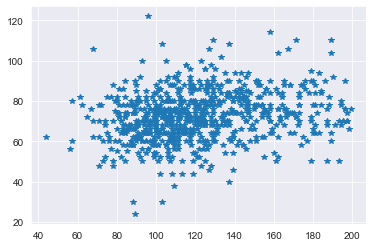

In [7]:
#血糖-血压散点图
sns.set_style("darkgrid")
plt.plot(data.Glucose,data.BloodPressure,"*")
plt.show()

In [8]:
#Pearson's r计算方法1
r,p=stats.pearsonr(data.Glucose,data.BloodPressure)
print("皮尔逊相关系数: ", r 
      , "\n p-value : ",p)

皮尔逊相关系数:  0.22319177824954217 
 p-value :  1.1385812038054551e-09


In [9]:
#Pearson's r计算方法2
r=np.corrcoef(data.Glucose,data.BloodPressure)
print("Pearson's correlation coefficient btw x and y is :", r[0][1])

Pearson's correlation coefficient btw x and y is : 0.22319177824954206


从上面的协方差为正可以得出血糖-血压呈正相关

从上面皮尔逊相关系数r=0.223的得出血糖-血压呈正的微弱的相关性。

从上面的较小的p=1.13e-09（<0.05）表示零假设是错误的。可以得出结论，相关系数不同于零，并且存在线性关系（如果p值小于0.05，通常会拒绝零假设）。

HW-4-2: 对于Data_Titantic.csv数据，请用分别用pearson r, spearman rho, kendall's tau

分别计算乘客年龄与买的票的等级的相关系数 (10分）

提示：

1. 先处理原始数据，去掉无效数据；

2. 把等级1st,2nd,3rd用DataFrame.replace替换成数值等级（如1.0，2.0， 3.0）再做相关分析

In [10]:
df2= pd.read_csv("Data_Titanic.csv")
df2.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [12]:
#将字符型转换为数值型
df2['PClass'] = df2['PClass'].replace(['1st','2nd','3rd'],[1.0,2.0,3.0])
df2['PClass'] =pd.DataFrame(df2['PClass'] ,dtype=np.float64);

In [13]:
#将空值填充为0.0，为了后文删去无效值方便
df2['PClass'] = df2['PClass'].fillna(0.0)
df2['Age'] = df2['Age'].fillna(0.0)

In [14]:
data2 = df2[(df2["PClass"] != 0.0 ) & (df2["Age"] !=0.0)]

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      756 non-null    object 
 1   PClass    756 non-null    float64
 2   Age       756 non-null    float64
 3   Sex       756 non-null    object 
 4   Survived  756 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 35.4+ KB


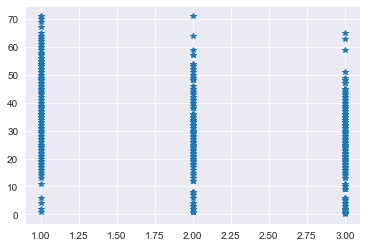

In [16]:
sns.set_style("darkgrid")
plt.plot(data2.PClass,data2.Age,"*")
plt.show()

In [17]:
print("pearsonrResult",stats.pearsonr(data2.PClass,data2.Age))
print(stats.spearmanr(data2.PClass,data2.Age))
print(stats.kendalltau(data2.PClass,data2.Age))

pearsonrResult (-0.4141214595264921, 1.0969903610990537e-32)
SpearmanrResult(correlation=-0.3936621650702517, pvalue=1.9756955531660778e-29)
KendalltauResult(correlation=-0.31037244778285683, pvalue=8.600565143832718e-28)


计算结果如上

可以看出，同样的数据，一般来说 Kendall的值的绝对值会比Spearman算出来要小，Spearman 的数值幅度会大点，鲁棒性差点

HW-4-3 : 针对汽车数据Data_mtcars.csv

（1）画出wt~ mpg散点图；用简单线性回归分析mpg（因变量），和wt(自变量）的关系，并根据回归结果中的截距和斜率及其显著性水平（p值), 对结果进行解释； 并解释R-square.（10分）

（2）用多元线性回归分析mpg（因变量），和wt(自变量）、hp(自变量）的关系，并根据回归结果中的各个自变量的系数及其显著性水平（p值), 对回归结果进行解释； 并解释R-square （10分）

In [18]:
df3= pd.read_csv("Data_mtcars.csv")
df3.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


slope斜率= -5.344471572722678 
intercept截距= 37.28512616734204 
r-value相关系数= -0.8676593765172281 
p-value检验相关系数是否显著= 1.2939587013504697e-10 
standard error of the estimate斜率参数的标准误差= 0.5591010450993226
The 0.95 CI of the slope s is 斜率参数的置信区间( -6.44030962111735 ,  -4.248633524328006 )
The (r,p) by stats.pearsonr (-0.8676593765172278, 1.2939587013505124e-10)


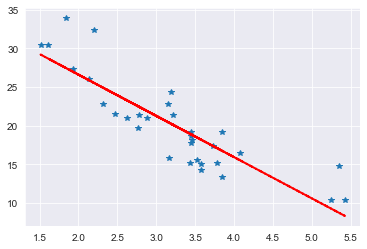

In [20]:
#画出wt~ mpg散点图
sns.set_style("darkgrid")
plt.plot(df3.wt,df3.mpg,"*")

s,itc,r,p,se=linregress(df3.wt,df3.mpg)
y_reg=itc+s*df3.wt

plt.plot(df3.wt,y_reg,linewidth=2,linestyle="dashed",color="red")
print("slope斜率=",s,"\nintercept截距=",itc,"\nr-value相关系数=",r,"\np-value检验相关系数是否显著=",p,
      "\nstandard error of the estimate斜率参数的标准误差=",se)

print("The 0.95 CI of the slope s is 斜率参数的置信区间(",s-1.96*se, ", ", s+1.96*se,")")
print("The (r,p) by stats.pearsonr", stats.pearsonr(df3.wt,df3.mpg))

In [21]:
import statsmodels.formula.api as smf
data=pd.DataFrame({"x":df3.wt,"y":df3.mpg})

# 这里就是直接输入公式，公式里的 "=" 号就用“~”来表示，constant 常数会自动加入。
# 一个自变量 y~x, 多个自变量可以写成 y~x
# 和之前的 stasmodel 里的 OLS 函数的差别就是，这里是 smf.ols 小写的 ols, 上面是大写的 OLS
model = smf.ols('y~x', data=data)
results = model.fit()

print(results.params)
print(results.summary())

Intercept    37.285126
x            -5.344472
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.29e-10
Time:                        10:26:45   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

由上看出

截距=37.28

斜率=-5.34，可以看出wt和mpg呈负相关，

相关系数r=-0.867，可以看出wt和mpg负相关，且相关关系较强

p-value=1.2939587013504697e-10《0.05 说明相关系数与0的差异显著，相关关系较强

R-squared=0.753，说明此线性模型较好的拟合了数据

### （2）用多元线性回归分析mpg（因变量），和wt(自变量）、hp(自变量）的关系，并根据回归结果中的各个自变量的系数及其显著性水平（p值), 对回归结果进行解释； 并解释R-square

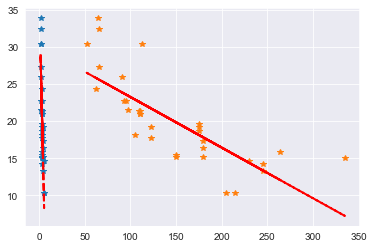

In [22]:
#分别画出各自的图
sns.set_style("darkgrid")
plt.plot(df3.wt,df3.mpg,"*")

s,itc,r,p,se=linregress(df3.wt,df3.mpg)
y_reg1=itc+s*df3.wt

plt.plot(df3.wt,y_reg1,linewidth=2,linestyle="dashed",color="red")

plt.plot(df3.hp,df3.mpg,"*")
s,itc,r,p,se=linregress(df3.hp,df3.mpg)
y_reg2=itc+s*df3.hp
plt.plot(df3.hp,y_reg2,linewidth=2,linestyle="dashed",color="red")

In [23]:
#由上图可知，两者斜率不同，需要计算交互作用
model = smf.ols('mpg ~ wt + hp + wt*hp', data=df3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.98e-13
Time:                        10:26:45   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.0

### 由上面数据可知wt前的权重系数为-8.2166，说明wt~mpg呈负相关，p值小于0.05，显著的负相关
### 由上面数据可知hp前的权重系数为-0.1201 ，说明hp~mpg呈负相关,p值小于0.05，显著的弱负相关
### 由上面数据可知hp前的权重系数为0.007 ,p值小于0.05，显著的弱相关
### R-squared=0.885,拟合度较好
### 所以可以写出多元回归方程 y= 49.80 - 8.22*wt - 0.12*hp + 0.02*wt*hp ，如何要画图的话，应该是一个立体图吧